## 데이터 불러오기 및 분석하기

## 네이버 영화 리뷰 데이터로 한글 텍스트 분류
데이터 다운로드 : https://github.com/e9t/nsmc


1.   ratings.txt - 전체 리뷰를 모아둔 데이터, 전체 20만개의 데이터로 구성
2.   ratings_train.txt - 학습데이터, 총 15개의 데이터로 구성
3.   ratings_test.txt - 평가 데이터, 총 5만개의 데이터로 구성



In [6]:
import numpy as np
import pandas as pd
import os

In [50]:
DATA_PATH = './'
print('파일 크기: ')
for file in os.listdir(DATA_PATH):
  if 'txt' in file:
    print(file.ljust(30)+str(round(os.path.getsize(DATA_PATH+ file) / 100000,2))+'MB')

파일 크기: 
ratings_test.txt              48.93MB
ratings.txt                   195.15MB
ratings_train.txt             146.29MB


In [51]:
#트레인 파일 불러오기
train_data = pd.read_csv(DATA_PATH + 'ratings_train.txt',header = 0, delimiter = '\t', quoting=3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [52]:
print('학습데이터 전체 개수: {}'.format(len(train_data)))

학습데이터 전체 개수: 150000


In [53]:
#리뷰 전체길이 확인
train_length = train_data['document'].astype(str).apply(len)
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

In [54]:
#리뷰 통계 정보
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length,25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length,75)))

리뷰 길이 최댓값: 158
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간값: 27.0
리뷰 길이 제1사분위: 16.0
리뷰 길이 제3사분위: 42.0


## 데이터 빈도 분석- 워드 클라우드 만들기

In [55]:
# 문자열 아닌 데이터 모두 제거
train_review = [review for review in train_data['document'] if type(review) is str]
train_review

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥',
 '약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.',
 '나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있

In [56]:
#긍정 1, 부정 0
print('긍정 리뷰 갯수: {}'.format(train_data['label'].value_counts()[1]))
print('부정 리뷰 갯수: {}'.format(train_data['label'].value_counts()[0]))

긍정 리뷰 갯수: 74827
부정 리뷰 갯수: 75173


## 데이터 전처리

In [57]:
# !pip install konlpy

In [58]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

DATA_PATH = './'
train_data = pd.read_csv(DATA_PATH+'ratings_train.txt', header = 0, delimiter='\t', quoting=3)

In [59]:
train_data['document'][:5]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

## 텍스트 전처리


1.   한글 아닌 문자들 제거
2.   문장을 단어로 나누기(어간추출)
3.   불용어 제거



In [60]:
#전처리 함수 만들기
def preprocessing(review, okt, remove_stopwords = False, stop_words =[]):
  #함수인자설명
  # review: 전처리할 텍스트
  # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)

  #2. okt 객체를 활용하여 형태소 단어로 나눔
  word_review = okt.morphs(review_text,stem=True)

  if remove_stopwords:
    #3. 불용어 제거(선택)
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [61]:
# 전체 텍스트 전처리
stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한']
okt = Okt()
clean_train_review = []

for review in train_data['document']:
  # 리뷰가 문자열인 경우만 전처리 진행
  if type(review) == str:
    clean_train_review.append(preprocessing(review,okt,remove_stopwords=True,stop_words= stop_words))
  else:
    clean_train_review.append([]) #str이 아닌 행은 빈칸으로 놔두기

clean_train_review[:4]

KeyboardInterrupt: 

In [ ]:
type(clean_train_review)

list

In [ ]:
#테스트 리뷰도 동일하게 전처리
test_data = pd.read_csv(DATA_PATH + 'ratings_test.txt', header = 0, delimiter='\t', quoting=3)

clean_test_review = []
for review in test_data['document']:
  if type(review) == str:
    clean_test_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
  else:
    clean_test_review.append([])

## 리뷰를 인덱스 벡터로 변환

In [ ]:
# 인덱스 벡터 변환 후 일정 길이 넘어가거나 모자라는 리뷰 패딩처리
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index #단어사전형태
MAX_SEQUENCE_LENGTH = 8 #문장 최대 길이

#학습 데이터
train_inputs = pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

#학습 데이터 라벨 벡터화
train_labels = np.array(train_data['label'])

#평가 데이터
test_inputs = pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
#평가 데이터 라벨 벡터화
test_labels = np.array(test_data['label'])

## 모델링 과정에서 사용 가능하도록 전처리 데이터 넘파이 저장

In [119]:
DEFAULT_PATH  = './'
DATA_PATH = 'save/'
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs={}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1

#전처리한 데이터들 파일로저장
import os

if not os.path.exists(DEFAULT_PATH + DATA_PATH):
  os.makedirs(DEFAULT_PATH+DATA_PATH)

#전처리 학습데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_INPUT_DATA,'wb'),train_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_LABEL_DATA,'wb'),train_labels)
#전처리 테스트데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_INPUT_DATA,'wb'),test_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_LABEL_DATA,'wb'),test_labels)

#데이터 사전 json으로 저장
json.dump(data_configs,open(DEFAULT_PATH + DATA_PATH + DATA_CONFIGS,'w'),ensure_ascii=False)

NameError: name 'word_vocab' is not defined

## 모델링

In [18]:
# 학습 데이터 불러오기
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm

In [19]:
#전처리 데이터 불러오기
DATA_PATH = './save/'
DATA_OUT = './save/DATA_OUT/'
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_PATH + INPUT_TRAIN_DATA,'rb'))
train_input = pad_sequences(train_input,maxlen=train_input.shape[1])
train_label = np.load(open(DATA_PATH + LABEL_TRAIN_DATA,'rb'))
prepro_configs = json.load(open(DATA_PATH+DATA_CONFIGS,'r'))

## 파라미터 세팅

In [20]:
model_name= 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs={'model_name': model_name, 'vocab_size':prepro_configs['vocab_size'],'embbeding_size':128, 'num_filters':100,'dropout_rate':0.5, 'hidden_dimension':250,'output_dimension':1}

## 모델 함수 만들기

In [21]:
class CNNClassifier(tf.keras.Model):

  def __init__(self, **kargs):
    super(CNNClassifier, self).__init__(name=kargs['model_name'])
    self.embedding = layers.Embedding(input_dim=kargs['vocab_size'], output_dim=kargs['embbeding_size'])
    self.conv_list = [layers.Conv1D(filters=kargs['num_filters'], kernel_size=kernel_size, padding='valid',activation = tf.keras.activations.relu,
                                    kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3)) for kernel_size in [3,4,5]]
    self.pooling = layers.GlobalMaxPooling1D()
    self.dropout = layers.Dropout(kargs['dropout_rate'])
    self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                            activation = tf.keras.activations.relu,
                            kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    self.fc2 = layers.Dense(units=kargs['output_dimension'],
                            activation=tf.keras.activations.sigmoid,
                            kernel_constraint= tf.keras.constraints.MaxNorm(max_value=3.))


  def call(self,x):
    x = self.embedding(x)
    x = self.dropout(x)
    x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis = 1)
    x = self.fc1(x)
    x = self.fc2(x)
    return x


## 모델 학습

In [22]:
from tensorflow.keras.models import save_model


In [23]:
model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy')])

#검증 정확도를 통한 EarlyStopping 기능 및 모델 저장 방식 지정
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=2)
checkpoint_path = DATA_OUT + model_name +'\weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
  print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
  os.makedirs(checkpoint_dir, exist_ok=True)
  print("{} -- Folder create complete \n".format(checkpoint_dir))

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor = 'val_accuracy', verbose=1, save_best_only = True,
    save_weights_only=True
)

history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs = NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

# 모델 저장하기
save_model(model,'./save/')

2024-04-23 11:11:39.861382: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-23 11:11:39.862284: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

./save/DATA_OUT -- Folder already exists 

Epoch 1/10


2024-04-23 11:11:40.683810: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-23 11:11:42.166470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


264/264 [==============================] - ETA: 0s - loss: 0.4597 - accuracy: 0.7754

2024-04-23 11:12:05.549328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.82260, saving model to ./save/DATA_OUT/cnn_classifier_kr\weights.h5
264/264 [==============================] - 26s 87ms/step - loss: 0.4597 - accuracy: 0.7754 - val_loss: 0.3905 - val_accuracy: 0.8226
Epoch 2/10
264/264 [==============================] - ETA: 0s - loss: 0.3543 - accuracy: 0.8444
Epoch 2: val_accuracy improved from 0.82260 to 0.82760, saving model to ./save/DATA_OUT/cnn_classifier_kr\weights.h5
264/264 [==============================] - 20s 76ms/step - loss: 0.3543 - accuracy: 0.8444 - val_loss: 0.3800 - val_accuracy: 0.8276
Epoch 3/10
264/264 [==============================] - ETA: 0s - loss: 0.2993 - accuracy: 0.8733
Epoch 3: val_accuracy did not improve from 0.82760
264/264 [==============================] - 19s 72ms/step - loss: 0.2993 - accuracy: 0.8733 - val_loss: 0.3970 - val_accuracy: 0.8261
Epoch 4/10
264/264 [==============================] - ETA: 0s - loss: 0.2547 - accuracy: 0.8948
Epoch 4: val_accuracy did not 

INFO:tensorflow:Assets written to: ./save/assets


INFO:tensorflow:Assets written to: ./save/assets


## 학습된 데이터로 테스트 데이터 검증

In [24]:
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = 'weights.h5'

test_input = np.load(open(DATA_PATH+INPUT_TEST_DATA,'rb'))
test_input = pad_sequences(test_input,maxlen=test_input.shape[1])
test_label_data = np.load(open(DATA_PATH + LABEL_TEST_DATA, 'rb'))

In [117]:
import os
model_path = os.path.join('save', 'DATA_OUT', 'cnn_classifier_kr', 'weights.h5')
model.load_weights(model_path)

#model.load_weights(r'save\DATA_OUT\cnn_classifier_kr\weights.h5')
#model.load_weights('Users/kang_hiee/Documents/GitHub/ubion/python/해커톤/빵구동구/감정분석/save/DATA_OUT/cnn_classifier_kr/weights.h5')

model.evaluate(test_input, test_label_data)

NameError: name 'model' is not defined

## 문장이 긍정인지 부정인지 예측하기

In [118]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
okt = Okt()
tokenizer  = Tokenizer()

DATA_CONFIGS = 'data_configs.json'
prepro_configs = json.load(open('./save/'+DATA_CONFIGS,'r'))
prepro_configs['vocab'] = word_vocab

tokenizer.fit_on_texts(word_vocab)

MAX_LENGTH = 8 #문장최대길이

sentence = input('감성분석할 문장을 입력해 주세요.: ')
#print(sentence)
sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\\s ]','', sentence)
stopwords = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'] # 불용어 추가할 것이 있으면 이곳에 추가
sentences = okt.morphs(sentence, stem=True) # 토큰화
sentences = [word for word in sentences if not word in stopwords] # 불용어 제거
vector  = tokenizer.texts_to_sequences(sentences)
pad_new = pad_sequences(vector, maxlen = MAX_LENGTH) # 패딩
#print('변환된 문자 결과값: ',pad_new)
model.load_weights(model_path) #모델 불러오기
predictions = model.predict(pad_new)
predictions = float(predictions.squeeze(-1)[1])
#print(predictions)
if(predictions > 0.5):
  print("{}\n {:.2f}% 확률로 긍정 리뷰입니다.\n".format(sentence,predictions * 100))
else:
  print("{}\n {:.2f}% 확률로 부정 리뷰입니다.\n".format(sentence, (1 - predictions) * 100))

NameError: name 'word_vocab' is not defined

In [123]:

df3 = pd.read_csv('clean_data_kang.csv')
#df3.to_csv('clean_data_kang.csv', index = False)

In [132]:
df3.dropna(inplace=True)

In [133]:
df3.iloc[503]

text    추억으로 남기기 좋은 우정템 커플템이 많아요
Name: 504, dtype: object

In [134]:
df3['text'] = df3['text'].apply(lambda x: re.sub(r'[^가-힣\s]', '', x))
df3['text'] = df3['text'].apply(lambda x: x.lstrip())
#df3['text'].dropna(inplace=True)
# 결과를 확인
print(df3)

# 결과를 새로운 CSV 파일로 저장
df3.to_csv('clean_data_kang.csv', index=False)

                                                   text
0                                    대전동구동락축제를 홍보하는 직원들
1     이번 행사는 월 일일까지 일간 오전 시부터 밤 시까지 동구 소제동 동광장로 대동천 ...
2     주요 행사 내용은 프리미엄 야시장 동구동락 콘서트 소제랜덤 댄스 페스티벌 소제 여행...
3                                 대전동구동락축제 프리미엄 야시장 배치도
4     대전전통나래관 사거리를 중심으로 북측에 주 무대가 있고 남쪽에는 포토스팟과 프리미엄...
...                                                 ...
5749                           동천 언니 부스를 보니 이게 설치 완료인 듯
5750                                부스 구경하는 거 좋아하는 인입니다
5751                                야간에 여기 불 들어오면 멋있을 듯
5752                                 월 대전축제인 대전동구 문화제야행
5753                    토일 이틀간 시간 되시는 분은 한번 가보셔도 좋을듯합니다

[5712 rows x 1 columns]


In [135]:

# 결과를 저장할 빈 리스트 초기화
results = []

# df['text']의 각 문장에 대해 반복
for sen in df3['text']:
    sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]', '', sen)
    sentences = okt.morphs(sentence, stem=True)  # 토큰화
    sentences = [word for word in sentences if not word in stopwords]  # 불용어 제거
    vector = tokenizer.texts_to_sequences(sentences)
    pad_new = pad_sequences(vector, maxlen=MAX_LENGTH)  # 패딩
    predictions = model.predict(pad_new)
    prediction = float(predictions.squeeze(-1)[0])

    # 긍정 리뷰인 경우 1, 부정 리뷰인 경우 0으로 결과 리스트에 추가
    results.append({
        'review': sentence,
        'prediction': prediction,
        'sentiment': 'positive' if prediction > 0.5 else 'negative'
    })

# 결과 리스트를 데이터프레임으로 변환
result_df = pd.DataFrame(results)

result_df.head()  # 데이터프레임의 상위 몇 개 행을 출력하여 확인

1/1 [==============================] - 0s 18ms/step


,review,prediction,sentiment
0,대전동구동락축제를 홍보하는 직원들,0.698284,positive
1,이번 행사는 월 일일까지 일간 오전 시부터 밤 시까지 동구 소제동 동광장로 대동천 ...,0.346095,negative
2,주요 행사 내용은 프리미엄 야시장 동구동락 콘서트 소제랜덤 댄스 페스티벌 소제 여행...,0.242547,negative
3,대전동구동락축제 프리미엄 야시장 배치도,0.698284,positive
4,대전전통나래관 사거리를 중심으로 북측에 주 무대가 있고 남쪽에는 포토스팟과 프리미엄...,0.551753,positive


In [136]:
result_df

,review,prediction,sentiment
0,대전동구동락축제를 홍보하는 직원들,0.698284,positive
1,이번 행사는 월 일일까지 일간 오전 시부터 밤 시까지 동구 소제동 동광장로 대동천 ...,0.346095,negative
2,주요 행사 내용은 프리미엄 야시장 동구동락 콘서트 소제랜덤 댄스 페스티벌 소제 여행...,0.242547,negative
3,대전동구동락축제 프리미엄 야시장 배치도,0.698284,positive
4,대전전통나래관 사거리를 중심으로 북측에 주 무대가 있고 남쪽에는 포토스팟과 프리미엄...,0.551753,positive
...,...,...,...
5707,동천 언니 부스를 보니 이게 설치 완료인 듯,0.501762,positive
5708,부스 구경하는 거 좋아하는 인입니다,0.532304,positive
5709,야간에 여기 불 들어오면 멋있을 듯,0.599149,positive
5710,월 대전축제인 대전동구 문화제야행,0.530551,positive


In [146]:
negative_df = result_df.loc[result_df['prediction'] <0.4]
negative_df.to_excel('negative_df.xlsx')

/var/folders/j6/txnqzgpx1wx4nmdw439z1jn80000gn/T/ipykernel_15447/2519030860.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_df['review'] = negative_df['review'].str.replace("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", " ", regex=True)  # Remove non-Korean characters and spaces


### 텍스트에서 많이 나온 단어 ###
      단어  빈도수
0     축제   93
1     부스   72
2     체험   56
3      수   54
4     이번   48
5     동락   40
6   프로그램   37
7      일   37
8     행사   36
9     동구   33
10    시간   33
11     시   32
12    진행   29
13    마켓   29
14     것   28
15    무대   27
16     등   26
17    방문   26
18    대전   26
19    무료   25
20   야시장   24
21     분   24
22  프리미엄   23
23     곳   22
24    사람   22
25    저녁   20
26    팔찌   19
27     더   19
28     금   19
29     원   19




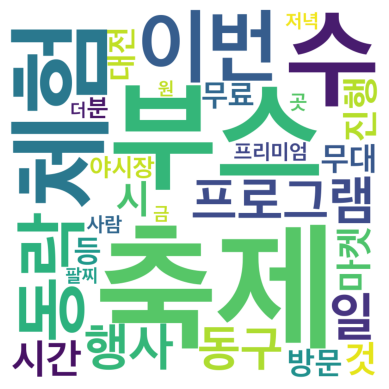

In [145]:
from collections import defaultdict
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Okt 객체 생성 (assuming clean_data2 is a DataFrame)
okt = Okt()

negative_df['review'] = negative_df['review'].str.replace("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", " ", regex=True)  # Remove non-Korean characters and spaces

# 단어 추출
final_result = defaultdict(list)
for idx, text in enumerate(negative_df['review']):
    nouns = okt.nouns(text)
    final_result['nouns'].extend(nouns)

# 빈도수 상위 30개 단어 추출
word_counts = Counter(final_result['nouns'])
top_30_words = word_counts.most_common(30)

# 결과 출력
print("### 텍스트에서 많이 나온 단어 ###")
print(pd.DataFrame(top_30_words, columns=['단어', '빈도수']))
print("\n")

# 워드클라우드 생성 (assuming you have AppleSDGothicNeoB.ttf font)
wc = WordCloud(font_path='AppleSDGothicNeoB.ttf',
               width=400, height=400, scale=2.0,
               max_font_size=150, background_color='white')
wordcloud = wc.generate_from_frequencies(dict(top_30_words))

# 워드클라우드 이미지 출력
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [149]:
df4 = pd.read_csv('/Users/kang_hiee/Documents/GitHub/ubion/python/해커톤/빵구동구/감정분석/clean_data_kang.csv')

In [151]:
df4.to_excel('원본.xlsx')

In [8]:
# KNU 한국어 감성사전
# 작성자 : 온병원, 박상민, 나철원
# 소속 : 군산대학교 소프트웨어융합공학과 Data Intelligence Lab
# 홈페이지 : dilab.kunsan.ac.kr
# 작성일 : 2018.05.14
# 뜻풀이 데이터 출처 : https://github.com/mrchypark/stdkor
# 신조어 데이터 출처 : https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%ED%84%B0%EB%84%B7_%EC%8B%A0%EC%A1%B0%EC%96%B4_%EB%AA%A9%EB%A1%9D
# 이모티콘 데이터 출처: https://ko.wikipedia.org/wiki/%EC%9D%B4%EB%AA%A8%ED%8B%B0%EC%BD%98
# SentiWordNet_3.0.0_20130122 데이터 출처 : http://sentiwordnet.isti.cnr.it/
# SenticNet-5.0 데이터 출처 : http://sentic.net/
# 감정단어사전0603 데이터 출처 : http://datascience.khu.ac.kr/board/bbs/board.php?bo_table=05_01&wr_id=91 
# 김은영, “국어 감정동사 연구”, 2004.02, 학위논문(박사) - 전남대학교 국어국문학과 대학원


#-*-coding:utf-8-*-

import json

class KnuSL():

	def data_list(self, wordname):	
		
		with open('/Users/kang_hiee/Documents/GitHub/ubion/python/해커톤/빵구동구/군산대/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
			data = json.load(f)
			result = [wordname,'0']	
			for i in range(0, len(data)):
				if data[i]['word'] == wordname:
					result.pop()
					result.pop()
					result.append(data[i]['word_root'])
					result.append(data[i]['polarity'])	
		
			r_word = result[0]
			s_word = result[1]
							
			print('어근 : ' + r_word)
			print('극성 : ' + s_word)		
		
		
		return r_word, s_word
        
		

if __name__ == "__main__":
	
	ksl = KnuSL()
	
	print("\nKNU 한국어 감성사전입니다~ :)")
	print("사전에 단어가 없는 경우 결과가 None으로 나타납니다!!!")
	print("종료하시려면 #을 입력해주세요!!!")
	print("-2:매우 부정, -1:부정, 0:중립 or Unkwon, 1:긍정, 2:매우 긍정")
	print("\n")	

	while(True):
		wordname = input("word : ")
		wordname = wordname.strip(" ")		
		if wordname != "#":
			print(ksl.data_list(wordname))
			print("\n")	
				

		elif wordname == "#":
			print("\n이용해주셔서 감사합니다~ :)")
			break



KNU 한국어 감성사전입니다~ :)
사전에 단어가 없는 경우 결과가 None으로 나타납니다!!!
종료하시려면 #을 입력해주세요!!!
-2:매우 부정, -1:부정, 0:중립 or Unkwon, 1:긍정, 2:매우 긍정



이용해주셔서 감사합니다~ :)


In [42]:
#import knusl

In [43]:
kn =KnuSL()

In [99]:
KnuSL().data_list('나쁘다')[1]

어근 : 나쁘
극성 : -2


'-2'

In [1]:
import pandas as pd

In [13]:
df1 = pd.read_csv('/Users/kang_hiee/Documents/GitHub/ubion/python/해커톤/빵구동구/final_songdo_beer.csv')

In [14]:
df1

,text
0,안녕하세욤 망쨩입니다ㅎ
1,오늘은 제가 지난 주말에 다녀온
2,송도 맥주축제를 소개해드려고 합니다 캬캬
3,작년에 친구한테 여기 맥주축제 얘기를 들었는데
4,작년엔 못가고 올해에 다녀왔는데 너무 만족했어요
...,...
13288,나머진 방와소 새벽 시까지
13289,춤추고 술묵다 잠
13290,누가 맥주를 저렇게 따라요
13291,등대지기가 준 등대로


In [15]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt


In [16]:
import re
okt = Okt()
# 결과를 저장할 빈 리스트 초기화
results = []
prediction = []
stopwords = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한','을','를']
# df['text']의 각 문장에 대해 반복
for sen in df1['text']:
    sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]', '', sen)
    #sentences = sentence.split(' ')
    sentences = okt.morphs(sentence, stem=True)  # 토큰화
    #sentences = [word for word in sentences if not word in stopwords]# 불용어 제거
    #print(sentences)
    cnt = 0
    for i in sentences:
        KnuSL().data_list(i)
        #prediction.append(int(KnuSL().data_list(i)[1]))
        cnt += int(KnuSL().data_list(i)[1])
    # vector = tokenizer.texts_to_sequences(sentences)
    # pad_new = pad_sequences(vector, maxlen=MAX_LENGTH)  # 패딩
    # predictions = model.predict(pad_new)
    # prediction = float(predictions.squeeze(-1)[0])

    #긍정 리뷰인 경우 1, 부정 리뷰인 경우 0으로 결과 리스트에 추가
    results.append({
        'review': sen,
        'prediction': cnt,
        'sentiment': 'positive' if  cnt > 0 else 'negative'
    })

# 결과 리스트를 데이터프레임으로 변환
result_df = pd.DataFrame(results)

result_df.head()  # 데이터프레임의 상위 몇 개 행을 출력하여 확인

,review,prediction,sentiment
0,안녕하세욤 망쨩입니다ㅎ,0,negative
1,오늘은 제가 지난 주말에 다녀온,0,negative
2,송도 맥주축제를 소개해드려고 합니다 캬캬,0,negative
3,작년에 친구한테 여기 맥주축제 얘기를 들었는데,1,positive
4,작년엔 못가고 올해에 다녀왔는데 너무 만족했어요,2,positive


In [20]:
negative_df_new = result_df.loc[result_df['prediction']>0]

In [21]:
negative_df_new

,review,prediction,sentiment
3,작년에 친구한테 여기 맥주축제 얘기를 들었는데,1,positive
4,작년엔 못가고 올해에 다녀왔는데 너무 만족했어요,2,positive
12,저는 돌아오는 길에는 사람이 많아서 전철을 탔는데,2,positive
15,어린 아이들은 보호자 동반하에 함께 올 수 있어,1,positive
26,실제로 보니까 훨씬 크더라구요,1,positive
...,...,...,...
13255,오기로 득템한 쏘맥 자격증,2,positive
13271,사람이 진심 개ㅐㅐㅐㅐ많앗고,2,positive
13273,사람 진심 개ㅐㅐㅐㅐㅐ많음,2,positive
13279,쏘맥 자격증같은거 발급 받지 마라효,1,positive


In [22]:
negative_df_new.to_excel('송도맥주_긍정.xlsx')

In [23]:
negative_df_new

,review,prediction,sentiment
3,작년에 친구한테 여기 맥주축제 얘기를 들었는데,1,positive
4,작년엔 못가고 올해에 다녀왔는데 너무 만족했어요,2,positive
12,저는 돌아오는 길에는 사람이 많아서 전철을 탔는데,2,positive
15,어린 아이들은 보호자 동반하에 함께 올 수 있어,1,positive
26,실제로 보니까 훨씬 크더라구요,1,positive
...,...,...,...
13255,오기로 득템한 쏘맥 자격증,2,positive
13271,사람이 진심 개ㅐㅐㅐㅐ많앗고,2,positive
13273,사람 진심 개ㅐㅐㅐㅐㅐ많음,2,positive
13279,쏘맥 자격증같은거 발급 받지 마라효,1,positive
